In [1]:
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_parquet("output/clean_data.pq")
df = df[(df.prescription_use == "Low")]  # Only handle low prescription use

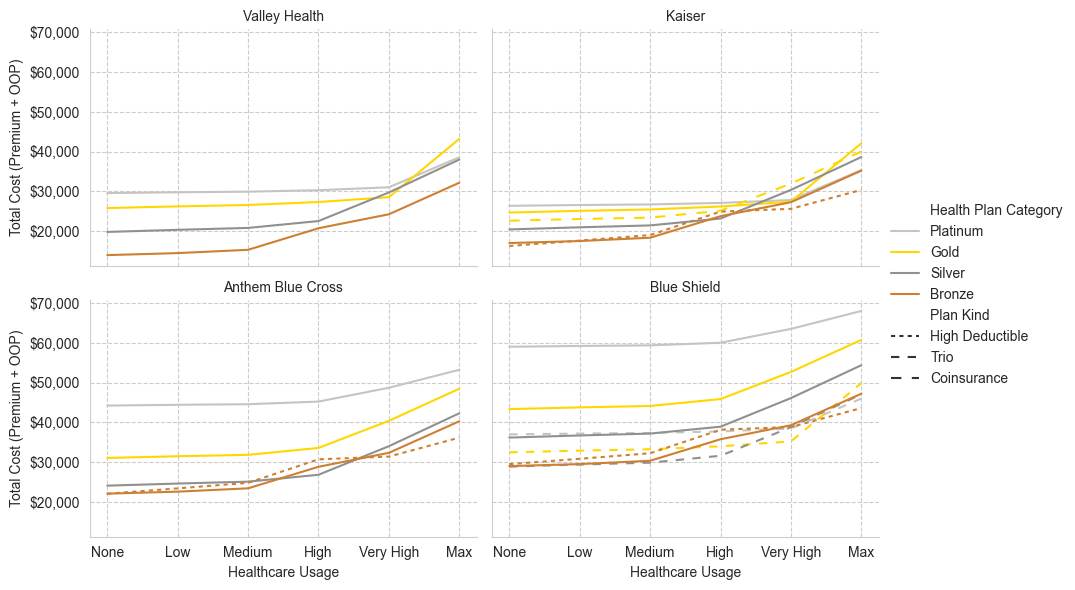

In [3]:
palette = {"Platinum": "#C5C4C2", "Gold": "gold", "Silver": "#909090", "Bronze": "#CD7F32"}
dashes = {"High Deductible": (2,2), "Trio": (4, 4), "Coinsurance": (5, 5), "": ""}

sns.set_style("whitegrid",{'grid.linestyle': '--'})
g = sns.FacetGrid(df, col="insurance", aspect=1.5, col_wrap=2)
g.map_dataframe(
    sns.lineplot, 
    x="Healthcare Usage", 
    y="Total Cost (Premium + OOP)",
    hue="Health Plan Category",
    palette=palette,
    style="Plan Kind",
    dashes=dashes,
)
fmt = mtick.StrMethodFormatter('${x:,.0f}')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(fmt)
g.set_titles(col_template="{col_name}")
g.add_legend();

### Definitions of Healthcare Usage:

In [4]:
care_variables = ["Healthcare Usage", "primary_visits", "specialist_visits", "lab_tests", "outpatient_visits"]
df[care_variables].drop_duplicates().set_index("Healthcare Usage").sort_index()

,primary_visits,specialist_visits,lab_tests,outpatient_visits
Healthcare Usage,,,,
None,0,0,0,0
Low,1,0,2,0
Medium,3,2,5,1
High,2,3,5,0
Very High,3,3,6,2
Max,999,999,999,999
